# Fitting multi-pole Debye model to dielectric data

In the ``user_libs`` sub-package is a module called ``DebyeFit`` which can be used to to fit a multi-Debye expansion to dielectric data, defined as
$$
\epsilon(\omega) = \epsilon_{\infty} + \sum_{i=1}^{N}\frac{\Delta\epsilon_{i}}{1+j\omega t_{0,i}},
$$
where $\epsilon(\omega)$ is frequency dependent dielectric properties, $\Delta\epsilon$ - difference between the real permittivity at zero and infinity frequency.
$\tau_{0}$ is relaxation time,  $\epsilon_{\infty}$ - real part of relative permittivity at infinity frequency, and $N$ is number of the Debye poles.

The user can choose between Havriliak-Negami, Jonsher, Complex Refractive Index Mixing models, and arbitrary dielectric data derived experimentally or calculated using some other function.

## Havriliak-Negami Function

The Havriliak–Negami relaxation is an empirical modification of the Debye relaxation model in electromagnetism, which in additionto the Debye equation has two exponential parameters
$$
\epsilon(\omega) = \epsilon_{\infty} + \frac{\Delta\epsilon}{\left(1+\left(j\omega t_{0}\right)^{a}\right)^{b}}
$$

The ```HavriliakNegami``` class has the following structure:

```
HavriliakNegami(f_min, f_max,
                alpha, beta, e_inf, de, tau_0,
                sigma, mu, mu_sigma, material_name,
                number_of_debye_poles=-1, f_n=50,
                plot=False, save=True,
                optimizer=PSO_DLS,
                optimizer_options={})
```

* ``f_min`` is first bound of the frequency range used to approximate the given function (Hz),
* ``f_max`` is second bound of the frequency range used to approximate the given function (Hz),
* ``alpha`` is real positive float number which varies 0 < $\alpha$ < 1,
* ``beta`` is real positive float number which varies 0 < $\beta$ < 1,
* ``e_inf`` is a real part of relative permittivity at infinity frequency,
* ```de``` is a difference between the real permittivity at zero and infinity frequency,
* ```tau_0``` is a relaxation time,
* ```sigma``` is a conductivity (Siemens/metre),
* ```mu``` is a relative permeability,
* ```mu_sigma``` is a magnetic loss,
* ```material_name``` is definition of material name,
* ```number_of_debye_poles``` is choosen number of Debye poles,
* ```f_n``` is choosen number of frequences,
* ```plot``` is a switch to turn on the plotting,
* ```save``` is a switch to turn on the saving final material properties,
* ```optimizer``` is a choosen optimizer to fit model to dielectric data,
* ```optimizer_options``` is a dict for options of choosen optimizer.


Debye fitting:   0%|          | 0/50 [00:00<?, ?it/s]

Approximating Havriliak-Negami function using 6 Debye poles
Havriliak-Negami function parameters: 
f_min      = 0.001
f_max      = 1000000000000.0
eps_inf    = 10
Delta_eps  = 5
tau_0      = 1e-06
alpha      = 0.5
beta       = 1



Debye fitting: 100%|██████████| 50/50 [00:00<00:00, 52.62it/s]


Debye expansion parameters: 
       |    e_inf     |      De      |       log(tau_0)        |
_________________________________________________________________
Debye 1|   1.66795    |   0.50265    |        -8.06333         |
_________________________________________________________________
Debye 2|   1.66795    |   1.35013    |        -5.10230         |
_________________________________________________________________
Debye 3|   1.66795    |   0.34434    |        -3.21300         |
_________________________________________________________________
Debye 4|   1.66795    |   1.05994    |        -7.00180         |
_________________________________________________________________
Debye 5|   1.66795    |   1.61389    |        -6.06350         |
_________________________________________________________________
Debye 6|   1.66795    |   0.09110    |        -7.85019         |
_________________________________________________________________
#material: 10.007699351023463 0.1 1 0 M2
#add_dispersi

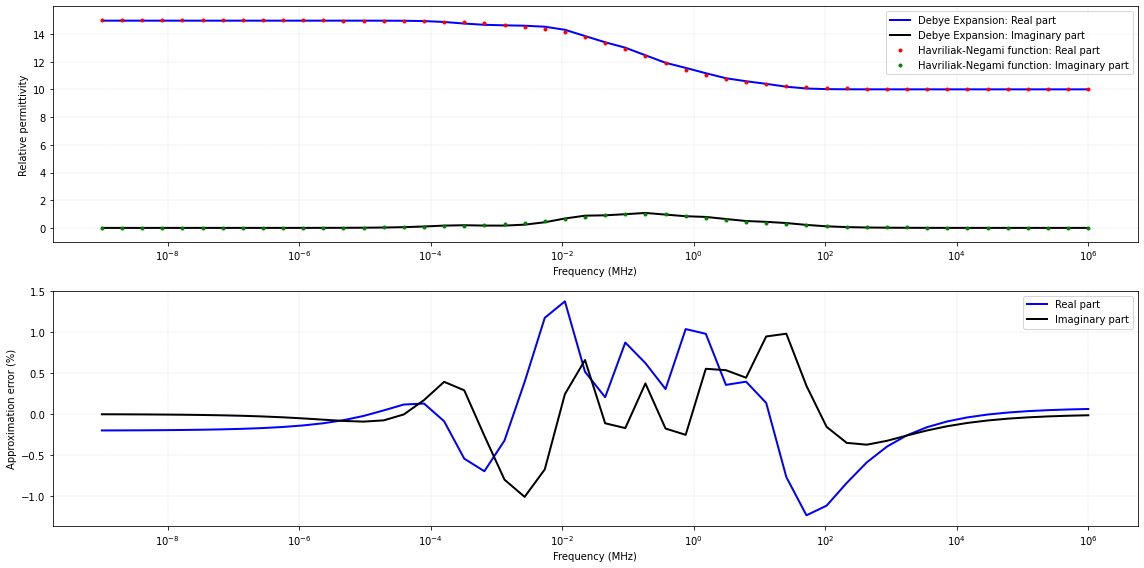

Time for aproximating Havriliak-Negami function: 3.20s


In [1]:
import timeit

from Debye_Fit import HavriliakNegami

start = timeit.default_timer()
setup = HavriliakNegami(1e12, 1e-3, 0.5, 1, 10, 5,
                        1e-6, 0.1, 1, 0, "M2", 6, plot=True)
setup.run()
stop = timeit.default_timer()
print(f'Time for aproximating {setup.name}: {stop - start:.2f}s')

## Jonsher Function

Jonscher function is mainly used to describe the dielectric properties of concrete and soils. The frequency domain expression of Jonscher
function is given by
$$
\epsilon(\omega) = \epsilon_{\infty} - a_{p}*\left( -j*\frac{\omega}{\omega_{p}} \right)^{n}
$$

The ```Jonscher``` class has the following structure:

```
Jonscher(f_min, f_max,
         e_inf, a_p, omega_p, n_p,
         sigma, mu, mu_sigma,
         material_name, number_of_debye_poles=-1,
         f_n=50, plot=False, save=True,
         optimizer=PSO_DLS,
         optimizer_options={})
```

* ``f_min`` is first bound of the frequency range used to approximate the given function (Hz),
* ``f_max`` is second bound of the frequency range used to approximate the given function (Hz),
* ``e_inf`` is a real part of relative permittivity at infinity frequency,
* ```a_p``` is a Jonscher parameter. Real positive float number,
* ```omega_p``` is a Jonscher parameter. Real positive float number,
* ```n_p``` Jonscher parameter, 0 < n_p < 1.
  

In [ ]:
from Debye_Fit import Jonscher

start = timeit.default_timer()
setup = Jonscher(1e6, 1e-5, 50, 1, 1e5, 0.7,
                 0.1, 1, 0.1, "M3", 4, plot=True)
setup.run()
stop = timeit.default_timer()
print(f'Time for aproximating {setup.name}: {stop - start:.2f}s')

## Complex Refractive Index Mixing (CRIM) Function

CRIM is the most mainstream approach for estimating the bulk permittivity of heterogeneous materials and has been widely applied for GPR applications. The function takes form of
$$
\epsilon(\omega)^{d} = \sum_{i=1}^{m}f_{i}\epsilon_{m,i}(\omega)^{d}
$$

The ```CRIM``` class has the following structure:

```
CRIM(f_min, f_max, a, volumetric_fractions,
     materials, sigma, mu, mu_sigma, material_name, 
     number_of_debye_poles=-1, f_n=50,
     plot=False, save=True,
     optimizer=PSO_DLS,
     optimizer_options={})
```

* ``f_min`` is first bound of the frequency range used to approximate the given function (Hz),
* ``f_max`` is second bound of the frequency range used to approximate the given function (Hz),
* ``a`` is a shape factor,
* ```volumetric_fractions``` is a volumetric fraction for each material,
* ```materials``` are arrays of materials properties, for each material [e_inf, de, tau_0].


Debye fitting:  16%|█▌        | 8/50 [00:00<00:00, 77.71it/s]

Approximating Complex Refractive Index Model (CRIM) using 2 Debye poles
CRIM parameters: 
Material 1.:
---------------------------------
              Vol. fraction = 0.5
                      e_inf = 3.0
                         De = 25.0
                 log(tau_0) = 6.0
Material 2.:
---------------------------------
              Vol. fraction = 0.5
                      e_inf = 3.0
                         De = 0.0
                 log(tau_0) = 3.0


Debye fitting: 100%|██████████| 50/50 [00:00<00:00, 106.67it/s]


Debye expansion parameters: 
       |    e_inf     |      De      |       log(tau_0)        |
_________________________________________________________________
Debye 1|   1.49497    |   8.60818    |         5.97583         |
_________________________________________________________________
Debye 2|   1.49497    |   0.74585    |         5.28139         |
_________________________________________________________________
#material: 2.9899451998419875 0.1 1 0 M4
#add_dispersion_debye: 2 8.608177164695848 945856.7632187434 0.7458504967309457 191158.77892511984 M4
The average fractional error for:
- real part: 0.31425830478547206
- imaginary part: 2.524477675234227

Material properties save at: ../materials\my_materials.txt


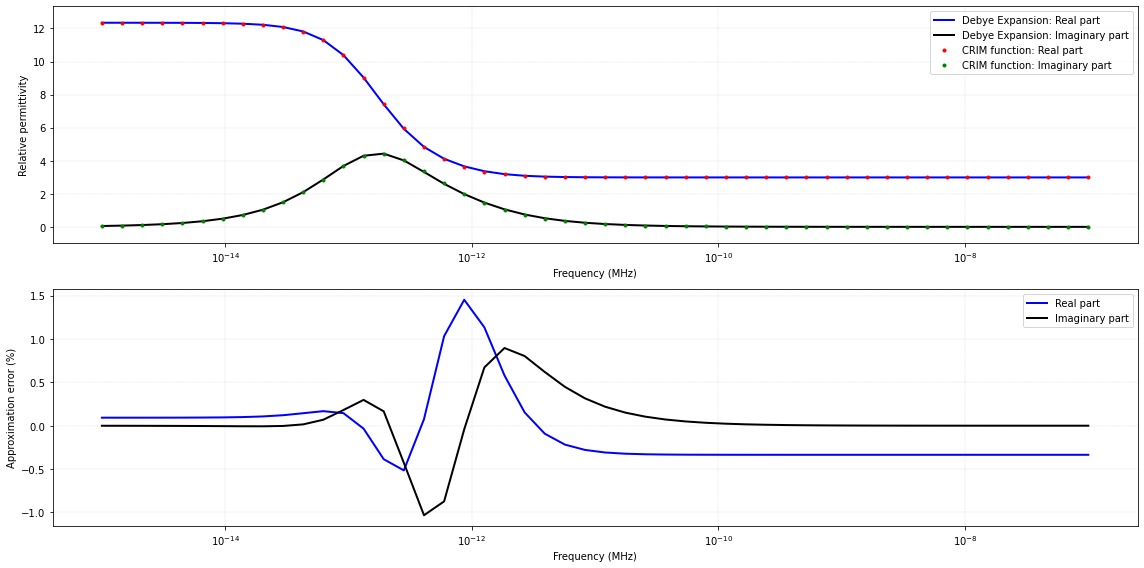

Time for aproximating CRIM function: 1.37s


In [2]:
import numpy as np
from Debye_Fit import Crim

f = np.array([0.5, 0.5])
material1 = [3, 25, 1e6]
material2 = [3, 0, 1e3]
materials = np.array([material1, material2])

start = timeit.default_timer()
setup = Crim(1*1e-1, 1e-9, 0.5, f, materials, 0.1,
             1, 0, "M4", 2, plot=True)
setup.run()
stop = timeit.default_timer()
print(f'Time for aproximating {setup.name}: {stop - start:.2f}s')

## Rawdata Class

The present package has the ability to model dielectric properties obtained experimentally by fitting multi-Debye functions to data given from a file.
The format of the file should be three columns. The first column contains the frequencies (Hz) associated with the electric permittivity point.
The second column contains the real part of the relative permittivity. The third column contains the imaginary part of the relative permittivity.
The columns should separated by coma by default (is it posible to define different separator).

The ```Rawdata``` class has the following structure:

```
Rawdata(self, filename,
        sigma, mu, mu_sigma,
        material_name, number_of_debye_poles=-1,
        f_n=50, delimiter =',',
        plot=False, save=True,
        optimizer=PSO_DLS,
        optimizer_options={})
```

* ``filename`` is a path to text file which contains three columns,
* ``delimiter`` is a separator for three data columns.


Debye fitting:  16%|█▌        | 8/50 [00:00<00:00, 70.84it/s]

Approximating Relaxation function using 3 Debye poles
Relaxation function parameters: 
filename   = Test.txt



Debye fitting: 100%|██████████| 50/50 [00:00<00:00, 95.84it/s]


Debye expansion parameters: 
       |    e_inf     |      De      |       log(tau_0)        |
_________________________________________________________________
Debye 1|   3.32035    |   4.99124    |        -8.96280         |
_________________________________________________________________
Debye 2|   3.32035    |   0.03699    |        -10.93662        |
_________________________________________________________________
Debye 3|   3.32035    |   15.01141   |        -9.01306         |
_________________________________________________________________
#material: 9.961043943504967 0.1 1 0.1 M1
#add_dispersion_debye: 3 4.991239097827597 1.0894257684137825e-09 0.03699445058788577 1.1571367374759199e-11 15.011414652196168 9.703714972155782e-10 M1
The average fractional error for:
- real part: 0.014793857949772156
- imaginary part: 0.04031790012967157

Material properties save at: ../materials\my_materials.txt


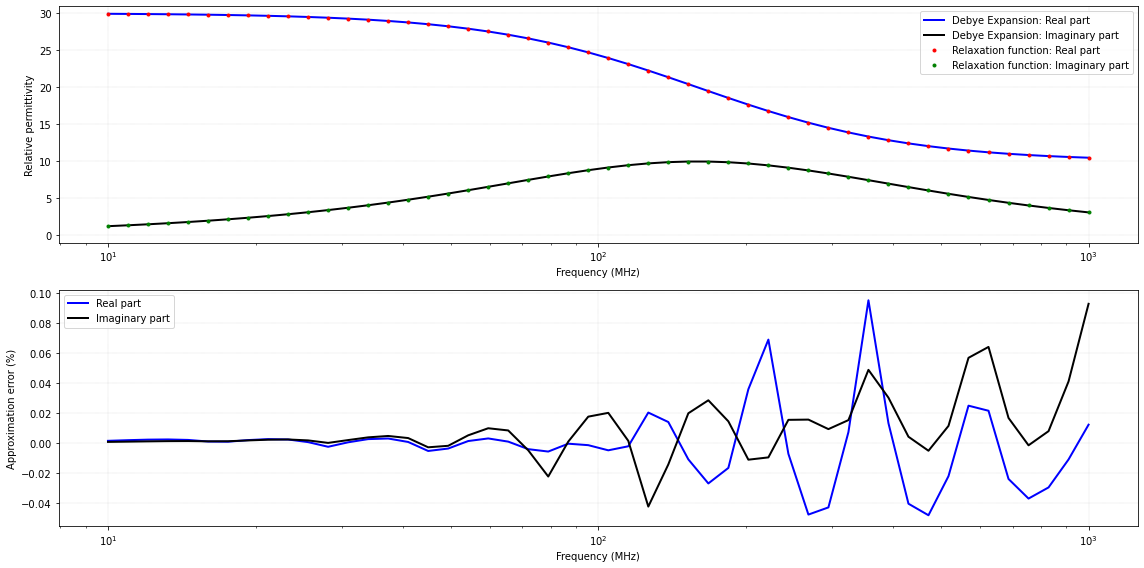

Time for aproximating Relaxation function: 2.19s


In [3]:
from Debye_Fit import Rawdata

start = timeit.default_timer()
setup = Rawdata("Test.txt", 0.1, 1, 0.1, "M1", 3, plot=True,
                 optimizer_options={'seed': 111})
setup.run()
stop = timeit.default_timer()
print(f'Time for aproximating {setup.name}: {stop - start:.2f}s')

# Optimisation algorithms

The package uses a hybrid linear-nonlinear optimisations techniques - combination of one of three optimisation method like Particle Swarm, Dual Annealing and Differential Evolution with Damped Least Square.
The weights for a linear combination of Debye functions are found using a damped least squares (DLS) method, while relaxation frequencies using a one of other nonlinear methods.
We compared with the PSO-DLSM, DA-DLSM, and DE-DLSM optimisatiom methods using the Havriliak-Negami (HN) model for relative permittivity given as
$$
\epsilon(\omega) = \epsilon_\infty + \frac{\Delta \epsilon}{[1+(j\omega\tau_0)^\alpha]^\beta},
$$
where $\epsilon_\infty$ is relative permittivity at infinity frequency, $\Delta \epsilon$ is the difference of relative permittivity at infinite frequency and the relative permittivity at zero frequency, and $\tau_0$ is the relaxation time. $\alpha$ and $\beta$ are constants. If $\alpha$ = $\beta$ = 1, then above equation reduces to **Debye** medium, if $\beta$ = 1 and 0 < $\alpha$ < 1 to **Cole-Cole** medium and if $\alpha$ = 1 and 0 < $\beta$ < 1 to **Cole-Davidson** medium.

For a fair comparison, the same parameters as those reported by Kelley et al. [1] are used. The parameters are presented in below Table.

| Parameter | $\Delta \epsilon$ | $\epsilon_\infty$ | $\tau_0 (s)$ | $\alpha$ | $\beta$ |
|-----------|------|---------|---------|-------|------|
| Value     | 5.6  |     2.7 | 9.4e-10 | 0.91  | 0.45 |

To illustrate the application of the method, a Havriliak-Negami permittivity model was approximated over the frequency range of 10 MHz to 100 GHz.

[1] D. F. Kelley, T. J. Destan and R. J. Luebbers, "Debye Function Expansions of Complex Permittivity Using a Hybrid Particle Swarm-Least Squares Optimization Approach," in IEEE Transactions on Antennas and Propagation, vol. 55, no. 7, pp. 1999-2005, July 2007.

Debye fitting:  12%|█▏        | 6/50 [00:00<00:00, 56.36it/s]

Using Hybrid Particle Swarm-Damped Least Squares optimisation
Approximating Havriliak-Negami function using 5 Debye poles
Havriliak-Negami function parameters: 
f_min      = 10000000.0
f_max      = 100000000000.0
eps_inf    = 2.7
Delta_eps  = 5.8999999999999995
tau_0      = 9.4e-10
alpha      = 0.91
beta       = 0.45



Debye fitting: 100%|██████████| 50/50 [00:00<00:00, 75.51it/s]


Debye expansion parameters: 
       |    e_inf     |      De      |       log(tau_0)        |
_________________________________________________________________
Debye 1|   0.56690    |   2.35633    |        -9.35975         |
_________________________________________________________________
Debye 2|   0.56690    |   0.67364    |        -10.93469        |
_________________________________________________________________
Debye 3|   0.56690    |   1.10087    |        -8.81873         |
_________________________________________________________________
Debye 4|   0.56690    |   1.29263    |        -10.04073        |
_________________________________________________________________
Debye 5|   0.56690    |   0.30908    |        -11.95347        |
_________________________________________________________________
#material: 2.834483987492076 0 0 0 Kelley
#add_dispersion_debye: 5 2.3563346313339872 4.367650372500618e-10 0.6736357027690343 1.162279864609756e-11 1.1008739611253733 1.518002006867315

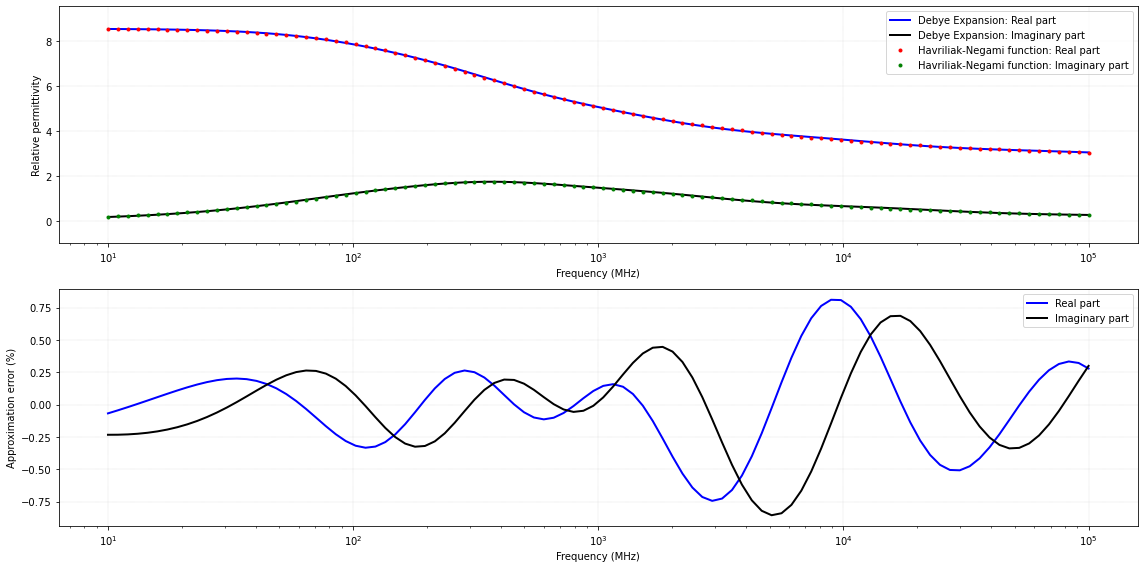

Time for Hybrid Particle Swarm-Damped Least Squares optimisation aproximating Havriliak-Negami function: 2.431174899999995
Using Hybrid Dual Annealing-Damped Least Squares optimisation
Approximating Havriliak-Negami function using 5 Debye poles
Havriliak-Negami function parameters: 
f_min      = 10000000.0
f_max      = 100000000000.0
eps_inf    = 2.7
Delta_eps  = 5.8999999999999995
tau_0      = 9.4e-10
alpha      = 0.91
beta       = 0.45

['Maximum number of iteration reached']
Debye expansion parameters: 
       |    e_inf     |      De      |       log(tau_0)        |
_________________________________________________________________
Debye 1|   0.58784    |   2.36707    |        -9.26212         |
_________________________________________________________________
Debye 2|   0.58784    |   0.75285    |        -8.74652         |
_________________________________________________________________
Debye 3|   0.58784    |   0.73071    |        -10.60461        |
______________________________

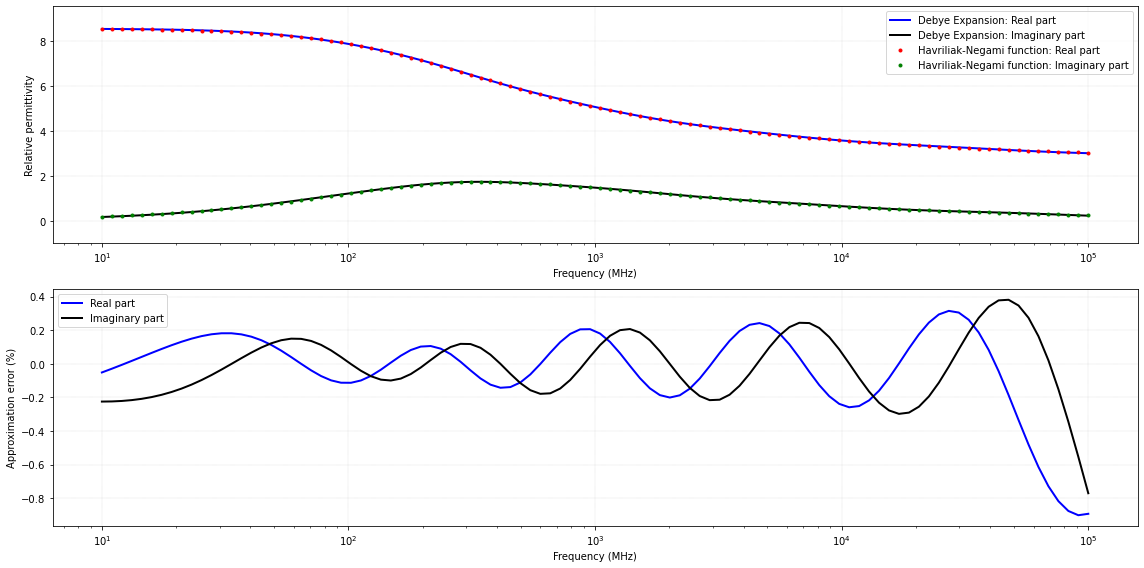

Time for Hybrid Dual Annealing-Damped Least Squares optimisation aproximating Havriliak-Negami function: 7.536437599999999
Using Hybrid Differential Evolution-Damped Least Squares optimisation
Approximating Havriliak-Negami function using 5 Debye poles
Havriliak-Negami function parameters: 
f_min      = 10000000.0
f_max      = 100000000000.0
eps_inf    = 2.7
Delta_eps  = 5.8999999999999995
tau_0      = 9.4e-10
alpha      = 0.91
beta       = 0.45

Optimization terminated successfully.
Debye expansion parameters: 
       |    e_inf     |      De      |       log(tau_0)        |
_________________________________________________________________
Debye 1|   0.58709    |   1.32628    |        -9.90608         |
_________________________________________________________________
Debye 2|   0.58709    |   0.41779    |        -11.48866        |
_________________________________________________________________
Debye 3|   0.58709    |   2.37916    |        -9.27566         |
________________________

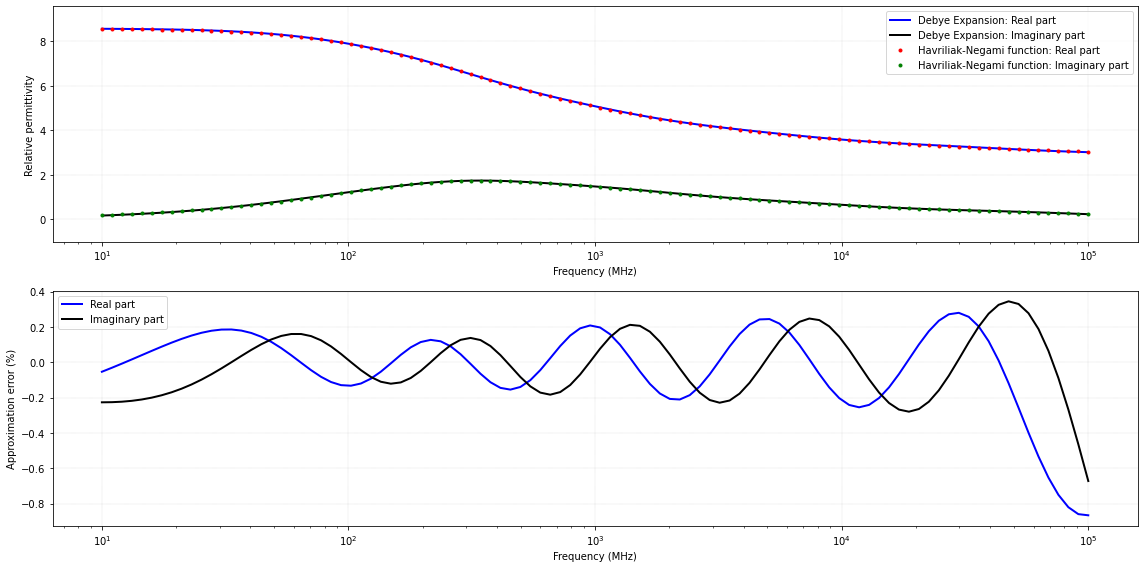

Time for Hybrid Differential Evolution-Damped Least Squares optimisation aproximating Havriliak-Negami function: 10.954678799999996
                              Optimizer                               | Duration |   Average Error    
       Hybrid Particle Swarm-Damped Least Squares optimisation        |  2.4312  |       2.3417       
       Hybrid Dual Annealing-Damped Least Squares optimisation        |  7.5364  |       1.7219       
   Hybrid Differential Evolution-Damped Least Squares optimisation    | 10.9547  |       1.6814       


In [4]:
from Debye_Fit import HavriliakNegami
from optimization import PSO_DLS, DA, DE

optimizers = {'Hybrid Particle Swarm-Damped Least Squares optimisation': PSO_DLS,
              'Hybrid Dual Annealing-Damped Least Squares optimisation': DA,
              'Hybrid Differential Evolution-Damped Least Squares optimisation': DE}
results = []
for key, value in optimizers.items():
    print(f'Using {key}')

    start = timeit.default_timer()
    setup = HavriliakNegami(f_min=1e7, f_max=1e11,
                            alpha=1-0.09, beta=0.45,
                            e_inf=2.7, de=8.6-2.7, tau_0=9.4e-10,
                            sigma=0, mu=0, mu_sigma=0,
                            material_name="Kelley",
                            number_of_debye_poles=5, f_n=100,
                            plot=True, save=False,
                            optimizer=value,
                            optimizer_options={'seed':111})
    error = setup.run()
    stop = timeit.default_timer()

    print(f'Time for {key} aproximating {setup.name}: {stop - start}')
    results.append({'optimizer': key, 'duration': stop - start, 'average error': error})

print(f"{'Optimizer':^70s}|{'Duration':^10s}|{'Average Error':^20s}")
for v in results:
    print(f"{v['optimizer']:^70s}|{v['duration']:^10.4f}|{v['average error']:^20.4f}")
